In [13]:
%%capture
import matplotlib.pyplot as plt
import roadmaptools.inout
import roadmaptools.plotting

# Road Network Preparation

In [14]:
# load road network from geojson file
roads = roadmaptools.inout.load_geojson("roads.geojson")

# Prepare the coord lists for matplotlib
xList, yList = roadmaptools.plotting.export_edges_for_matplotlib(roadmaptools.plotting.geojson_edges_iterator(roads))

# Plot

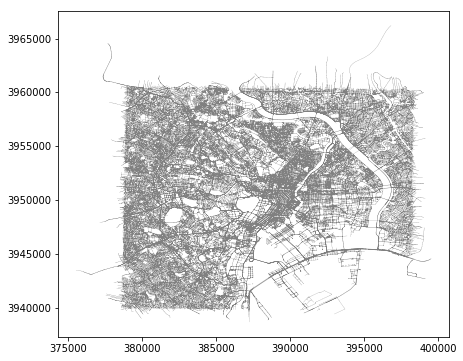

In [50]:
fig, axis = plt.subplots(1, 1, figsize=(7, 6))
axis.plot(xList, yList, linewidth=0.2, color='gray', zorder=1)


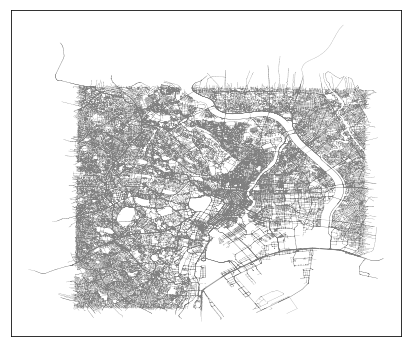

In [51]:
# First, we remove the numbers around the axes to save some space. Zou should always do it, unless the coordinates are 
# important for our map.
axis.tick_params(
	which='both',  # both major and minor ticks are affected
	bottom=False,  # ticks along the x axis
	labelbottom=False, # x labels
    left=False, labelleft=False) # y ticks and labels
fig

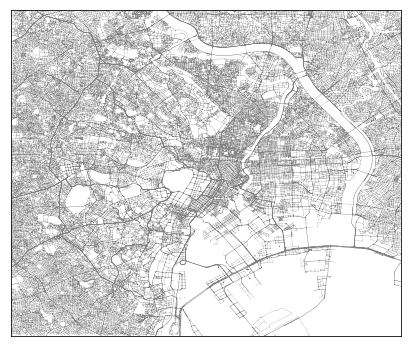

In [52]:
# No we zoom to the city center and skip the lone highways. You can experiment with the limits for the best result.
axis.set_xlim(378800, 398300)
axis.set_ylim(3939800, 3960300)
fig

# Stations Preparation

In [53]:
stations = roadmaptools.inout.load_json("stations.json", encoding="utf-8")
stations
def json_node_iterator(nodes):
	for node in nodes['elements']:
		if node["type"] == "node":
			yield (node["lat"], node["lon"])
xlist, ylist = roadmaptools.plotting.export_nodes_for_matplotlib(json_node_iterator(stations))

# Plot Stattions

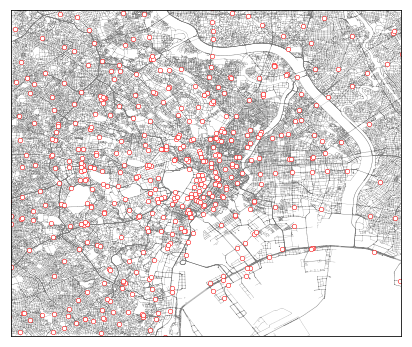

In [54]:
axis.scatter(xlist, ylist, edgecolors='red', facecolors='white', marker='o', s=20, linewidths=0.5, zorder=2)
fig